In [35]:
import newspaper
from newspaper import Article
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')

In [1]:
websites = [
    'https://exitosanoticias.pe/v1/elecciones-2020-jose-luna-morales-propone-cambiar-sistema-de-afp/',
    'https://elcomercio.pe/economia/peru/afp-onp-que-cambios-en-el-sistema-de-pensiones-podria-aprobar-el-nuevo-congreso-prima-afp-profuturo-afp-afp-habitat-integra-afp-noticia/',
    'https://www.expreso.com.pe/actualidad/afp-pension-promedio-no-llega-ni-a-s-1300/'
]

In [16]:
sw_es = set(stopwords.words('spanish'))

In [25]:
textos = []
for webst in websites:
    print(webst[0:30])
    article = Article(url=webst)
    article.download() 
    article.parse() 
    article.nlp() 
    corpus = article.text
    corpus = corpus.replace('\n', ' ').lower()
    tx_tk = set(word_tokenize(corpus))
    #print(tx_tk)
    textos = list(tx_tk - sw_es) + textos
print(textos)

https://exitosanoticias.pe/v1/
https://elcomercio.pe/economia
https://www.expreso.com.pe/act
['klugger', 'pesar', 'defecto', 'entonces', 'sobornos', 'aportantes', 'banca', 'finanzas', 'según', ':', 'felices', 'falsa', 'avisar', 'inminencia', 'chile', 'termine', 'salimos', 'auditadas', 'trabajo', 'menos', 'cargo', 'brasileña', 'indicó', 'así', 'económico', '40', 'deban', 'vinculaciones', 'posibilidad', 'perdieron', 'perú', 'mil', 'percibirá', '.', 'directorios', 'convertirá', 'vejez', 'demora', 'experto', 'responsabilidad', 'mejor', '25', 'afp', 'acá', 'constructora', 'pueda', 'afiliados', 'auditar', 'medio', 'servicio', 'si', 'reporte', 'violentos', 'continuo', 'dejado', 'pues', 'casi', 'empieza', '1', 'aprietos', 'señaló', 'remuneración', '2017', 'siguiéndonos', 'demoramos', 'auditen', 'puede', 'monitorear', 'ninguna', 'otorgará', 'asignación', 'vivir', 'problema', '4,000', 'forma', 'incluir', 'informe', 'cifra', 'promedio', '80', 'garcía', 'exista', 'desconocimiento', '”', 'suma', 'p

In [34]:
textos_2 = []
for pal in textos:
    #print(pal, end=' ')
    if 3 < len(pal) and len(pal) < 15:
        textos_2.append(pal)
#print(textos_2)
texto = ' '.join(textos_2)
#print(texto)

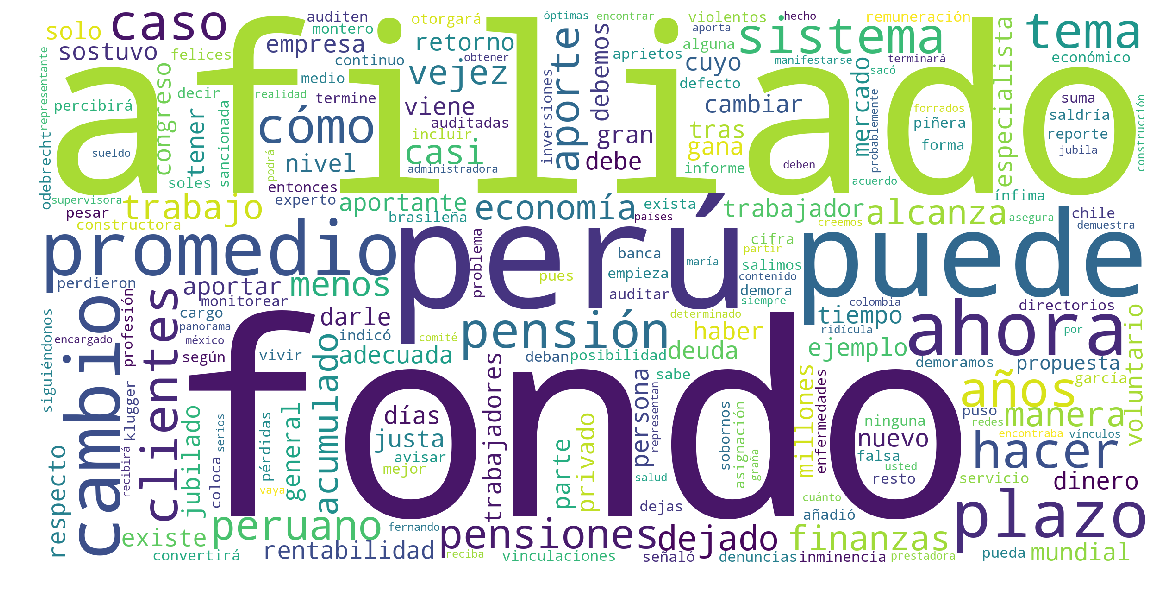

In [39]:
wc = WordCloud(
    width=2400, height=1200,
    background_color = 'white',
    min_font_size=12
).generate(texto)
plt.figure(figsize=(16,8))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()